### 导入所用模块

In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import neighbors

### 读取电影评分，评分分布，上映日期等信息

In [2]:
movies_without_boxings = pd.read_table('untitle.txt', header=None)
movies_without_boxings.rename(columns={0: 'Name', 1: 'IDs', 2: 'Year', 3: 'Ratings', 4: 'People', 
                      5: '5star', 6: '4star', 7: '3star', 8: '2star', 9: '1star'}, inplace=True)

### 读取电影票房信息

In [3]:
boxings = pd.read_table('movie_boxings.txt', header=None)
boxings.rename(columns={0: 'Name', 1: 'Boxing'}, inplace=True)

### 合并上述信息并整理数据

In [4]:
movies = pd.merge(movies_without_boxings, boxings)

### 删除干扰信息

In [5]:
del movies[10]
del movies_without_boxings[10]

### 筛选出记录到了票房信息的电影

In [6]:
movies = movies[~movies['Boxing'].isnull()]

### 清洗票房数据信息

In [7]:
movies['Boxing'] = movies['Boxing'].apply(lambda x: eval(x[:-1]))

In [8]:
movies

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,Boxing
6,红番区,1296011,1995,7.3,44300,11.4,44.2,41.4,2.7,0.3,0.3
14,没事偷着乐,1300678,1999,7.5,21191,14.5,47.3,35.7,2.2,0.4,0.1
16,缘，妙不可言,2148618,1999,5.3,8833,1.4,7.1,53.4,30.5,7.7,1.2
19,宝莲灯,2327493,1999,6.1,10913,10.1,18.8,43.8,19.4,8.0,2.3
27,国歌,1868115,1999,6.5,1082,7.8,22.4,59.9,7.4,2.5,6.5
34,宇宙与人,1464628,2000,8.3,1228,41.8,36.5,17.8,3.3,0.6,0.1
35,足球大侠,4172589,2000,5.1,50,3.4,10.3,27.6,48.3,10.3,1.1
37,卧虎藏龙,1301168,2000,7.9,172117,27.2,45.1,25.2,2.2,0.4,1000.0
50,哈利·波特与魔法石,1295038,2002,8.7,253215,47.3,39.9,12.0,0.7,0.2,5600.3
52,烟雨红颜,1456391,2002,6.4,1873,10.0,23.4,47.7,15.9,3.0,600.1


### 对所有电影（无论是否含有票房信息）的评分结构进行初步划分，划分出最典型的L型，倒L型，P型，b型，C型，无法划分的类别标记为Other

In [9]:
def judge_structure(five, four, three, two, one):
    if five > 70:
        return "Reversed L"
    elif one > 70:
        return "L"
    elif (five > 25 and one > 25):
        return "C"
    elif (five > 20 and one > 25 and five + one > 50) or (five > 25 and one > 20 and five + one > 50):
        return "C"
    elif (five > 25 and four > 25):
        return "P"
    elif (five > 20 and four > 25 and five + four > 50) or (five > 25 and four > 20 and five + four > 50):
        return "P"
    elif (two > 25 and one > 25):
        return "b"
    elif (two > 20 and one > 25 and two + one > 50) or (two > 25 and one > 20 and two + one > 50):
        return "b"
    else:
        return "Other"

In [10]:
movies_without_boxings['structure'] = list(map(lambda a, b, c, d, e: judge_structure(a, b, c, d, e), 
                                               movies_without_boxings['5star'], movies_without_boxings['4star'], 
                                               movies_without_boxings['3star'], movies_without_boxings['2star'], 
                                               movies_without_boxings['1star']))

In [11]:
movies_without_boxings

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,structure
0,高朋满座,2347277,1991,7.2,377,16.5,32.1,45.3,5.8,0.4,Other
1,狂吻俄罗斯,1962939,1994,6.5,577,5.5,26.5,58.8,8.3,1.0,Other
2,花田喜事,1416728,1993,7.5,34705,17.9,43.5,34.3,3.7,0.6,Other
3,年年有今日,4191644,1994,7.8,281750,24.5,44.4,27.6,3.0,0.4,P
4,白日女鬼,2995142,1994,5.7,102,5.9,11.8,50.0,26.5,5.9,Other
5,梅雨季节,1766592,1995,8.4,293,43.3,36.7,17.2,1.7,1.1,P
6,红番区,1296011,1995,7.3,44300,11.4,44.2,41.4,2.7,0.3,Other
7,铜马铁燕传奇,2995215,1995,5.3,213,3.9,9.0,51.6,21.3,14.2,Other
8,市政厅,3713860,1996,8.5,10557,46.9,35.1,15.7,1.9,0.3,P
9,疯狂的兔子,1938923,1997,6.6,8740,13.9,26.0,42.5,11.1,6.5,Other


### 使用KNN分类器，划分结果为5类

In [12]:
movie_classifier = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=1, 
                               p=2, metric='minkowski')

把所有电影筛选为训练集（通过初步划分有明确分类的电影）与预测集（通过初步划分被标记为Other的电影）

In [13]:
training_set = movies_without_boxings[movies_without_boxings['structure'] != 'Other'].sort_values(by='Name')

In [14]:
predict_set = movies_without_boxings[movies_without_boxings['structure'] == 'Other'].sort_values(by='Name')

### 整理训练集的数据，供分类器训练所用

In [15]:
x, y = [], []

for i in range(len(training_set)):
    item = training_set.iloc[i]
    current_movie = []
    current_movie.append(item['5star'])
    current_movie.append(item['4star'])
    current_movie.append(item['3star'])
    current_movie.append(item['2star'])
    current_movie.append(item['1star'])
    x.append(current_movie)
    y.append(item['structure'])

In [16]:
movie_classifier.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### 整理预测集的数据，交由分类器进行预测

In [17]:
px = []

for i in range(len(predict_set)):
    item = predict_set.iloc[i]
    current_movie = []
    current_movie.append(item['5star'])
    current_movie.append(item['4star'])
    current_movie.append(item['3star'])
    current_movie.append(item['2star'])
    current_movie.append(item['1star'])
    px.append(current_movie)

In [18]:
py = movie_classifier.predict(px)

### 将所预测的分类结果添加到预测集中，并将预测集与训练集合并，得到所有电影的分类结果

In [19]:
del predict_set['structure']
predict_set['structure'] = py

In [20]:
movies_with_structure = pd.concat([training_set, predict_set], axis=0)

In [21]:
movies_with_structure.sort_values(by='Name', inplace=True)

In [22]:
movies_with_structure

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,structure
1271,0.5的爱情,25746519,2014,4.4,2903,3.1,6.4,27.3,31.6,31.6,b
926,007：大破天幕杀机,2363876,2013,6.9,169109,9.3,37.4,45.5,6.8,1.1,P
387,007：大破量子危机,1946882,2008,6.4,66806,5.1,25.1,56.7,11.6,1.6,P
936,101次求婚,5319835,2013,5.6,126764,3.4,13.9,50.7,25.1,7.0,b
1829,20:16,27031469,2017,5.7,255,12.5,18.8,21.9,34.4,12.5,b
1300,21岁派对,6873085,2014,5.9,6927,5.0,17.1,51.2,21.4,5.4,b
1657,234说爱你,20472738,2016,6.1,6926,5.2,22.3,51.5,17.0,4.1,P
339,27套礼服,2132120,2008,6.7,56818,5.9,30.0,56.8,6.6,0.7,P
228,28周后,1758487,2007,6.7,26493,8.7,31.4,47.1,10.4,2.4,P
1704,28岁未成年,26658568,2016,5.7,54587,5.5,17.3,42.1,25.1,10.0,b


### 统计电影数量随年份的变化

In [23]:
years_movie_count = movies_with_structure.groupby('Year').count()

In [24]:
years_movie_count

,Name,IDs,Ratings,People,5star,4star,3star,2star,1star,structure
Year,,,,,,,,,,
1991,1,1,1,1,1,1,1,1,1,1
1993,1,1,1,1,1,1,1,1,1,1
1994,3,3,3,3,3,3,3,3,3,3
1995,3,3,3,3,3,3,3,3,3,3
1996,1,1,1,1,1,1,1,1,1,1
1997,3,3,3,3,3,3,3,3,3,3
1999,19,19,19,19,19,19,19,19,19,19
2000,8,8,8,8,8,8,8,8,8,8
2001,9,9,9,9,9,9,9,9,9,9


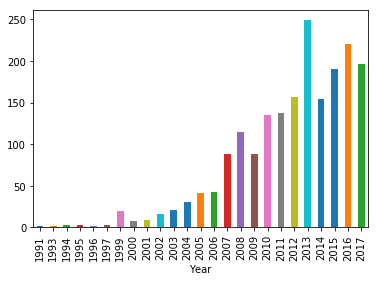

In [25]:
years_movie_count['Name'].plot(kind='bar')

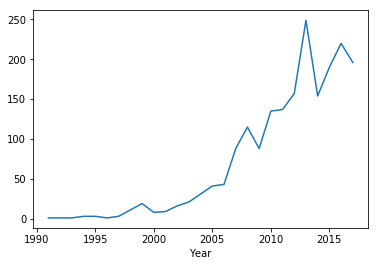

In [26]:
years_movie_count['Name'].plot()

* **电影的数量基本随年代的增长而在不断增长**
* **2014年出现了一个比较大的滑坡，之后又保持了增长的势头**

### 统计电影评分随年份的变化

In [27]:
years_movie_ratings = movies_with_structure.groupby('Year').mean()

In [28]:
years_movie_ratings

,IDs,Ratings,People,5star,4star,3star,2star,1star
Year,,,,,,,,
1991,2.347277e+06,7.200000,377.000000,16.500000,32.100000,45.300000,5.800000,0.400000
1993,1.416728e+06,7.500000,34705.000000,17.900000,43.500000,34.300000,3.700000,0.600000
1994,3.049908e+06,6.666667,94143.000000,11.966667,27.566667,45.466667,12.600000,2.433333
1995,2.019273e+06,7.000000,14935.333333,19.533333,29.966667,36.733333,8.566667,5.200000
1996,3.713860e+06,8.500000,10557.000000,46.900000,35.100000,15.700000,1.900000,0.300000
1997,1.574724e+06,6.866667,20342.666667,12.633333,31.900000,44.766667,7.900000,2.800000
1999,6.348798e+06,7.142105,14135.000000,22.552632,28.042105,35.889474,10.426316,3.110526
2000,2.355973e+06,7.000000,42054.125000,20.325000,32.575000,29.375000,12.150000,5.537500
2001,4.989445e+06,7.122222,27358.222222,16.477778,35.866667,37.111111,8.133333,2.411111


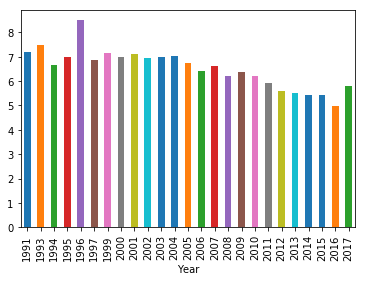

In [29]:
years_movie_ratings['Ratings'].plot(kind='bar')

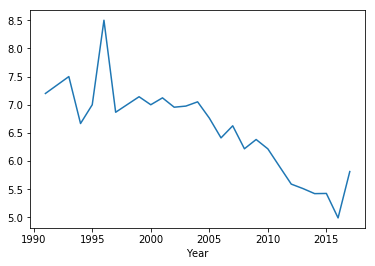

In [30]:
years_movie_ratings['Ratings'].plot()

* **整体上平均评分有不断滑坡的走向**
* **2016年的评分为最低值，与印象中当年抨击院线中国产烂片泛滥一致**

### 计算一年内电影上映数量与评分的相关系数

In [31]:
years_movie_ratings['Ratings'].corr(years_movie_count['IDs'])

-0.88841036302869403

### 最近三年内的电影单年内的评分占比情况

In [32]:
movies_2015 = movies_with_structure[movies_with_structure['Year'] == 2015]

In [33]:
movies_2015

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,structure
1506,一念天堂,26611801,2015,5.3,32270,6.5,13.5,35.0,28.0,17.0,b
1419,一路向前,26382888,2015,3.6,4908,3.6,3.1,15.8,26.7,50.8,b
1334,一路惊喜,25880244,2015,5.0,25562,3.7,9.6,37.0,32.1,17.6,b
1366,万物生长,25872931,2015,5.8,97573,5.2,18.3,45.9,22.9,7.7,b
1359,三更车库,20513060,2015,3.3,1474,1.7,2.3,11.0,27.3,57.7,b
1496,不可思异,26277156,2015,3.8,14591,2.2,4.0,19.1,31.3,43.4,b
1504,不能错过,26339762,2015,2.6,181,1.2,4.8,2.4,3.6,88.0,L
1444,东京公关女,26357180,2015,4.9,394,3.0,4.5,40.1,40.9,11.5,b
1445,东京食尸鬼JACK OVA,26817016,2015,6.8,603,21.4,22.8,34.8,14.2,6.8,P
1505,东北偏北,26061902,2015,6.3,5742,5.2,25.9,50.8,15.3,2.8,P


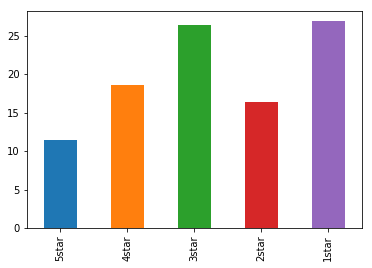

In [34]:
movies_2015.mean()[['5star', '4star', '3star', '2star', '1star']].plot(kind='bar')

In [35]:
movies_2016 = movies_with_structure[movies_with_structure['Year'] == 2016]

In [36]:
movies_2016

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,structure
1657,234说爱你,20472738,2016,6.1,6926,5.2,22.3,51.5,17.0,4.1,P
1704,28岁未成年,26658568,2016,5.7,54587,5.5,17.3,42.1,25.1,10.0,b
1582,708090之深圳恋歌,25922900,2016,2.9,847,3.0,1.1,7.4,14.4,74.1,L
1663,T台魔王,26873291,2016,2.3,139,0.0,0.0,3.3,6.7,90.0,L
1588,X战警：天启,25786060,2016,7.8,194010,23.8,45.3,27.1,3.1,0.6,P
1514,一切都好,26425088,2016,6.4,10993,7.5,24.5,49.8,14.9,3.4,P
1549,一夜危机,26742358,2016,2.3,80,2.1,0.0,0.0,6.3,91.7,L
1631,七月半2：前世今生,26647080,2016,2.7,651,1.3,1.0,5.3,15.0,77.4,L
1654,三个孬家伙,26873166,2016,4.8,393,4.8,7.1,32.5,35.7,19.8,b
1563,不朽的时光,25762270,2016,6.5,4101,13.3,25.5,38.7,15.9,6.5,P


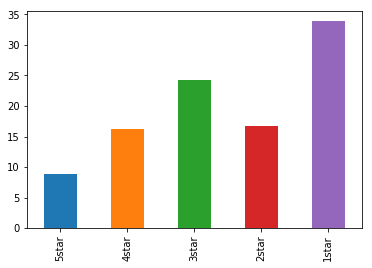

In [37]:
movies_2016.mean()[['5star', '4star', '3star', '2star', '1star']].plot(kind='bar')

In [38]:
movies_2017 = movies_with_structure[movies_with_structure['Year'] == 2017]

In [39]:
movies_2017

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,structure
1829,20:16,27031469,2017,5.7,255,12.5,18.8,21.9,34.4,12.5,b
1850,52赫兹，我爱你,26780534,2017,6.0,1749,7.9,21.5,39.8,22.4,8.5,b
1841,“吃吃”的爱,26279202,2017,5.5,37881,7.0,12.9,38.9,29.6,11.6,b
1735,一万公里的约定,26388555,2017,4.6,3715,4.1,8.6,25.4,37.4,24.5,b
1799,一念无明,26704590,2017,7.9,38519,21.5,55.6,21.2,1.5,0.2,P
1773,一条狗的使命,6873143,2017,7.7,152069,23.1,42.4,30.3,3.7,0.6,P
1736,一路逆风,26416774,2017,4.6,2254,8.3,9.3,25.6,19.6,37.2,b
1885,七天,2999500,2017,7.5,20552,14.2,49.4,32.8,3.0,0.5,P
1875,三生三世十里桃花,25975243,2017,6.4,96814,16.4,27.8,30.6,9.9,15.3,P
1765,上海王,4078592,2017,4.8,4946,2.9,8.2,33.8,38.1,17.0,b


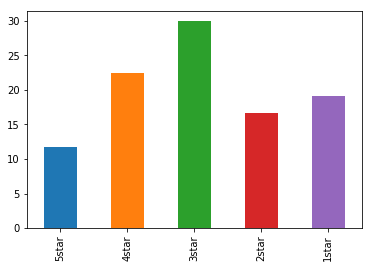

In [40]:
movies_2017.mean()[['5star', '4star', '3star', '2star', '1star']].plot(kind='bar')

**与上面的统计一致，2016年电影的一星占比是最高的**

### 不同评分结构的平均评分占比情况

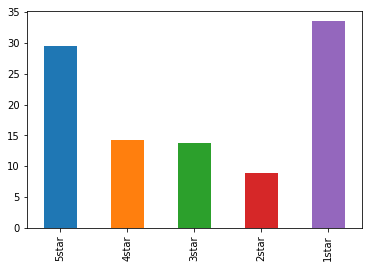

In [41]:
C_movies = movies_with_structure[movies_with_structure['structure'] == 'C']
C_movies.mean()[['5star', '4star', '3star', '2star', '1star']].plot(kind='bar')

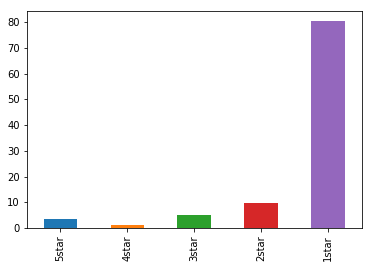

In [42]:
L_movies = movies_with_structure[movies_with_structure['structure'] == 'L']
L_movies.mean()[['5star', '4star', '3star', '2star', '1star']].plot(kind='bar')

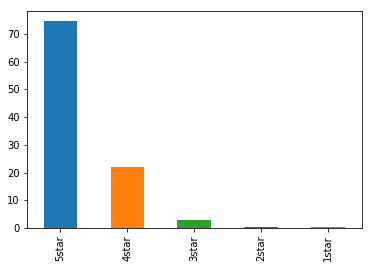

In [43]:
RL_movies = movies_with_structure[movies_with_structure['structure'] == 'Reversed L']
RL_movies.mean()[['5star', '4star', '3star', '2star', '1star']].plot(kind='bar')

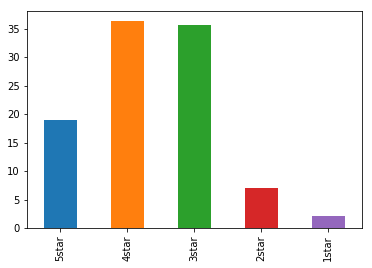

In [44]:
P_movies = movies_with_structure[movies_with_structure['structure'] == 'P']
P_movies.mean()[['5star', '4star', '3star', '2star', '1star']].plot(kind='bar')

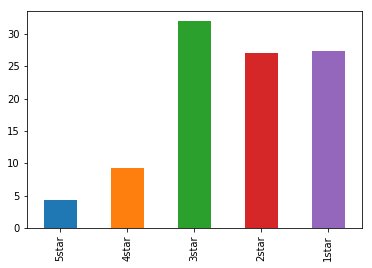

In [45]:
b_movies = movies_with_structure[movies_with_structure['structure'] == 'b']
b_movies.mean()[['5star', '4star', '3star', '2star', '1star']].plot(kind='bar')

**几张图对比下来总体还是比较符合一般对于一个评分结构的总体印象的**

### 电影票房与评分的关系

In [46]:
movie_structure_and_boxing = pd.merge(movies, movies_with_structure)
movie_structure_and_boxing = movie_structure_and_boxing[movie_structure_and_boxing['Boxing'] > 10000]
movie_structure_and_boxing

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,Boxing,structure
21,加勒比海盗,1298070,2003,8.6,344105,43.1,43.7,12.4,0.7,0.1,46446.8,P
27,十面埋伏,1308722,2004,5.7,100949,3.6,15.0,49.8,24.9,6.7,15360.2,b
32,天下无贼,1291550,2004,7.7,223139,17.9,50.4,29.3,2.1,0.3,12000.5,P
72,夜宴,1418605,2006,5.6,93357,3.2,14.3,49.4,26.3,6.8,13001.0,b
79,满城尽带黄金甲,1499008,2006,5.2,109603,2.4,9.5,44.3,32.6,11.1,29103.2,b
99,蜘蛛侠3,1418189,2007,7.0,101237,10.0,35.5,48.2,5.6,0.7,14983.1,P
105,南京,1941283,2007,8.2,14804,36.0,43.1,18.7,1.7,0.5,15981.0,P
106,变形金刚,2146991,2007,7.6,219853,19.9,45.9,29.8,3.7,0.8,29057.2,P
109,哈利·波特与凤凰社,1457217,2007,7.7,152081,22.7,44.2,30.0,2.7,0.4,14526.9,P
137,投名状,1947089,2007,6.9,102021,9.4,34.8,47.2,7.5,1.1,19548.9,P


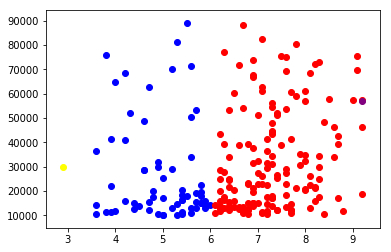

In [47]:
for i in range(len(movie_structure_and_boxing)):
    x = movie_structure_and_boxing.iloc[i]['Ratings']
    y = movie_structure_and_boxing.iloc[i]['Boxing']
    if y > 100000:
        continue
    color = None
    structure = movie_structure_and_boxing.iloc[i]['structure']
    if structure == 'P':
        color = 'red'
    elif structure == 'b':
        color = 'blue'
    elif structure == 'L':
        color = 'yellow'
    elif structure == 'Reversed L':
        color = 'purple'
    elif structure == 'C':
        color = 'orange'
    else:
        color = 'black'
    plt.scatter(x, y, c=color)

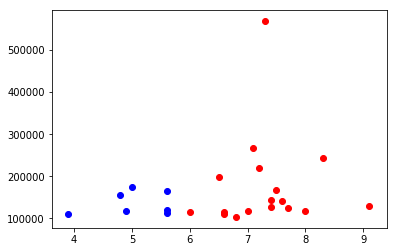

In [48]:
for i in range(len(movie_structure_and_boxing)):
    x = movie_structure_and_boxing.iloc[i]['Ratings']
    y = movie_structure_and_boxing.iloc[i]['Boxing']
    if y < 100000:
        continue
    color = None
    structure = movie_structure_and_boxing.iloc[i]['structure']
    if structure == 'P':
        color = 'red'
    elif structure == 'b':
        color = 'blue'
    elif structure == 'L':
        color = 'yellow'
    elif structure == 'Reversed L':
        color = 'purple'
    elif structure == 'C':
        color = 'orange'
    else:
        color = 'black'
    plt.scatter(x, y, c=color)

* **从票房1亿以上的电影的评分来看，并没有展现出很大的区别度**
* **从票房10亿以上的电影的评分来看，基本上是偏向好评的电影占了更大多数**

### 通过评分结构、上映年代、所得评分预测电影票房

In [50]:
movies_with_structure

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,structure
1271,0.5的爱情,25746519,2014,4.4,2903,3.1,6.4,27.3,31.6,31.6,b
926,007：大破天幕杀机,2363876,2013,6.9,169109,9.3,37.4,45.5,6.8,1.1,P
387,007：大破量子危机,1946882,2008,6.4,66806,5.1,25.1,56.7,11.6,1.6,P
936,101次求婚,5319835,2013,5.6,126764,3.4,13.9,50.7,25.1,7.0,b
1829,20:16,27031469,2017,5.7,255,12.5,18.8,21.9,34.4,12.5,b
1300,21岁派对,6873085,2014,5.9,6927,5.0,17.1,51.2,21.4,5.4,b
1657,234说爱你,20472738,2016,6.1,6926,5.2,22.3,51.5,17.0,4.1,P
339,27套礼服,2132120,2008,6.7,56818,5.9,30.0,56.8,6.6,0.7,P
228,28周后,1758487,2007,6.7,26493,8.7,31.4,47.1,10.4,2.4,P
1704,28岁未成年,26658568,2016,5.7,54587,5.5,17.3,42.1,25.1,10.0,b


In [51]:
all_structure_and_boxing = pd.merge(movies, movies_with_structure)

In [54]:
x, y = [], []
for i in range(len(all_structure_and_boxing)):
    item = all_structure_and_boxing.iloc[i]
    current = []
    current.append(item['Ratings'])
    if item['structure'] == 'Reversed L':
        current.append(0)
    elif item['structure'] == 'P':
        current.append(1)
    elif item['structure'] == 'C':
        current.append(2)
    elif item['structure'] == 'b':
        current.append(3)
    elif item['structure'] == 'L':
        current.append(4)
    x.append(current)
    y.append(item['Boxing'])

In [55]:
regression = linear_model.LinearRegression()
regression.fit(x, y)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
px = []

for i in range(len(movies_with_structure)):
    item = movies_with_structure.iloc[i]
    current = []
    current.append(item['Ratings'])
    if item['structure'] == 'Reversed L':
        current.append(0)
    elif item['structure'] == 'P':
        current.append(1)
    elif item['structure'] == 'C':
        current.append(2)
    elif item['structure'] == 'b':
        current.append(3)
    elif item['structure'] == 'L':
        current.append(4)
    px.append(current)

In [57]:
result = regression.predict(px)

In [58]:
movies_with_structure['Boxing'] = result

In [59]:
movies_with_structure

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,structure,Boxing
1271,0.5的爱情,25746519,2014,4.4,2903,3.1,6.4,27.3,31.6,31.6,b,5051.297864
926,007：大破天幕杀机,2363876,2013,6.9,169109,9.3,37.4,45.5,6.8,1.1,P,12872.116365
387,007：大破量子危机,1946882,2008,6.4,66806,5.1,25.1,56.7,11.6,1.6,P,11588.708105
936,101次求婚,5319835,2013,5.6,126764,3.4,13.9,50.7,25.1,7.0,b,8131.477687
1829,20:16,27031469,2017,5.7,255,12.5,18.8,21.9,34.4,12.5,b,8388.159339
1300,21岁派对,6873085,2014,5.9,6927,5.0,17.1,51.2,21.4,5.4,b,8901.522643
1657,234说爱你,20472738,2016,6.1,6926,5.2,22.3,51.5,17.0,4.1,P,10818.663149
339,27套礼服,2132120,2008,6.7,56818,5.9,30.0,56.8,6.6,0.7,P,12358.753061
228,28周后,1758487,2007,6.7,26493,8.7,31.4,47.1,10.4,2.4,P,12358.753061
1704,28岁未成年,26658568,2016,5.7,54587,5.5,17.3,42.1,25.1,10.0,b,8388.159339


In [64]:
movies_with_structure[movies_with_structure['Boxing'] > 10000].sort_values(by='Ratings')

,Name,IDs,Year,Ratings,People,5star,4star,3star,2star,1star,structure,Boxing
1651,爱的蟹逅,26738093,2016,5.9,292,14.9,34.0,14.9,2.1,34.0,P,10305.299845
1443,华丽上班族,11776289,2015,6.0,38922,6.2,22.7,45.0,19.3,6.8,P,10561.981497
169,男孩向前冲,2357394,2006,6.0,210,7.0,21.8,47.9,12.7,10.6,P,10561.981497
1191,甜蜜杀机,21765841,2014,6.0,12419,5.0,20.1,51.7,18.2,5.1,P,10561.981497
700,爱到底,3552301,2011,6.0,18339,4.9,20.1,52.4,17.7,5.0,P,10561.981497
1140,斯大林格勒,6714930,2013,6.0,14048,5.6,20.6,48.8,19.7,5.3,P,10561.981497
1380,妈咪侠,25932073,2015,6.0,840,6.7,21.8,45.4,19.0,7.1,P,10561.981497
1409,煎饼侠,25895276,2015,6.0,208800,7.9,22.6,41.3,18.7,9.5,P,10561.981497
1836,放学后,4289922,2017,6.1,193,8.5,16.9,52.1,15.5,7.0,P,10818.663149
85,散打,1417441,2004,6.1,545,6.9,19.6,52.0,15.9,5.6,P,10818.663149


* **预测结果是，想要获取1亿之上的票房，需要电影的评分达到及格线水准，这个结果相对而言偏高了一些**
* **利用多元线性回归的预测效果并不理想，可以进一步完善或者尝试其他的回归算法**